In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('loan_application.csv')
dataset.head(6)

,Load_ID,Name,Gender,Married,Dependent,Education,Self_Employed,Application_No,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP100000,Applicant_0,Male,Yes,1,Not Graduate,No,APP1000,6392.0,7598.0,394.0,180.0,1.0,Urban,Y
1,LP100001,Applicant_1,Male,Yes,3+,Graduate,Yes,APP1001,10690.0,NaN,329.0,240.0,0.0,Rural,Y
2,LP100002,Applicant_2,Female,Yes,1,Graduate,Yes,APP1002,2521.0,2271.0,118.0,360.0,NaN,Rural,N
3,LP100003,Applicant_3,Male,Yes,1,NaN,Yes,APP1003,12613.0,14322.0,630.0,360.0,NaN,Urban,Y
4,LP100004,Applicant_4,Male,No,2,Not Graduate,No,APP1004,13795.0,NaN,593.0,NaN,NaN,NaN,N
5,LP100005,Applicant_5,Male,Yes,NaN,Not Graduate,Yes,APP1005,22029.0,6641.0,536.0,360.0,0.0,Rural,NaN


In [11]:
dataset.isnull().sum()  

Load_ID                 0
Name                    0
Gender                100
Married               100
Dependent             100
Education             100
Self_Employed         100
Application_No          0
Applicant_Income        0
Coapplicant_Income      0
Loan_Amount           100
Loan_Amount_Term      100
Credit_History        100
Property_Area         100
Loan_Status           100
dtype: int64

In [10]:
dataset['Applicant_Income'].fillna(dataset['Applicant_Income'].mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_10580\2306907714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Applicant_Income'].fillna(dataset['Applicant_Income'].mean(), inplace=True)


In [4]:
dataset.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,900.000000,900.000000,900.000000,900.000000,900.000000
mean,13545.182222,7576.337778,378.163333,227.200000,0.534444
std,10430.314659,6278.599756,187.861222,86.928454,0.499090
min,1506.000000,22.000000,52.000000,120.000000,0.000000
25%,6990.250000,3634.750000,207.000000,180.000000,0.000000
50%,13421.000000,7552.000000,383.500000,240.000000,1.000000
75%,19454.250000,11218.250000,539.000000,240.000000,1.000000
max,246597.000000,144981.000000,696.000000,360.000000,1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_10580\3973380218.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Applicant_Income'], kde=True)


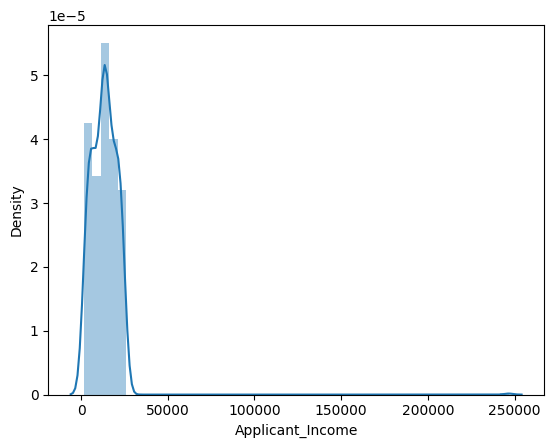

In [13]:
sns.distplot(dataset['Applicant_Income'], kde=True)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset['Applicant_Income_norm'] = scaler.fit_transform(dataset[['Applicant_Income']])
dataset.head(6)


C:\Users\USER\AppData\Local\Temp\ipykernel_10580\107530529.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Applicant_Income'], color='blue', label='Applicant Income')
C:\Users\USER\AppData\Local\Temp\ipykernel_10580\107530529.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datas

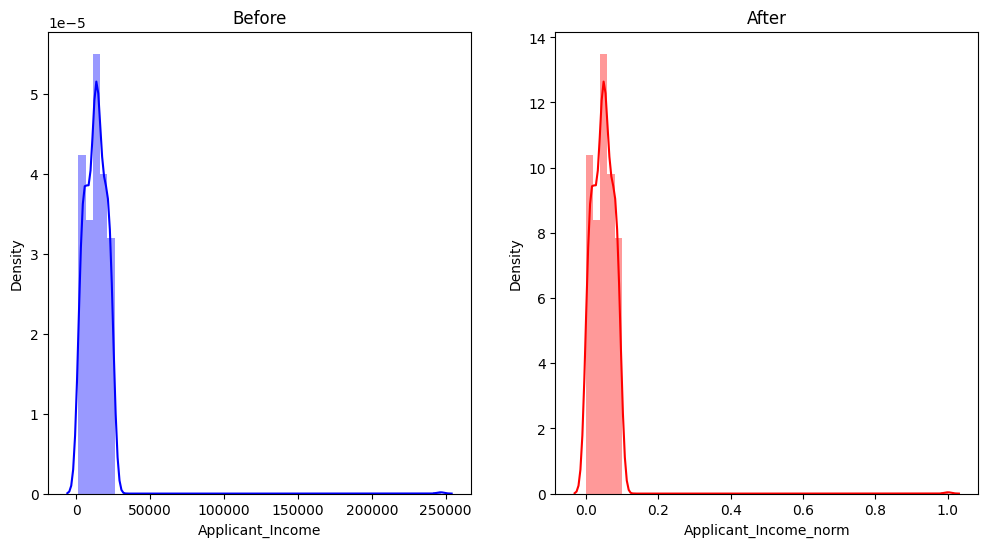

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(dataset['Applicant_Income'], color='blue', label='Applicant Income')
plt.subplot(1,2,2)
plt.title('After')
sns.distplot(dataset['Applicant_Income_norm'], color='red', label='Standardized Applicant Income')
plt.show()